In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                    index =["김주란","박동명","서지현","송기훈"],
                   columns=["시간","성적"])
data

,시간,성적
김주란,2,20
박동명,4,40
서지현,8,80
송기훈,9,90


# 수학 공식을 사용한 방법

In [73]:
from sklearn.linear_model import LinearRegression  # 수학 공식이 적용이되는 라이브러리

linear_model = LinearRegression()

linear_model.fit(data[["시간"]],data["성적"])
# 파라미터가 앞에는 2차원 배열 [[]]뒤엔느 1차원[]일까?  --> 특성은 하나인경우가 거의 없음. 여러개닌까 그러니 리스트를 여러개써줘야함.
# 거기에 반해 y는 하나밖에 안쓰닌까 1차원쓰는거 (라벨에는 하나만)

LinearRegression()

In [74]:
# w, b값을 출력
print("w: ", linear_model.coef_) 
print("b: ", linear_model.intercept_)

w:  [10.]
b:  7.105427357601002e-15


In [75]:
# 7시간을 공부하면 몇점이 나올까요?
linear_model.predict([[7]])
# 이렇게 값을 예측할 수 있음

#현재 공식을 넣어서 하는 문제점은 ?  -> 데이터가많아지면 속도가 굉장히 느려짐

array([70.])

In [76]:
# 약간 오차가있더라도 빨리할수잇는 방법
# 경사하강법
# 경사가 작아지는 방향으로 계속 내려가면 산을 내려갈 수 있다.  (여기서 경사라는건 오차를 뜻함 - 기울기) 
# 기울기(오차)가 작아지는 방향

In [77]:
# 오차가 작아지는 방향으로 w,b를 갱신해나가는 (바꿔보면서 찾아나가는)
#  1. w,b를 초기화 - > 그럼원래공식이남음
# 오차를 구햇을때 작을때만 변경을하고 클때는 변경을 안해주는 !

# 경사하강법을 이용한 선형회귀


In [78]:
from sklearn.linear_model import SGDClassifier
# 경사하강법 : 항상 전체 데이터를 이용해서 기울기를 계산
# 데이터가 많아지면 계산속도가 굉장히 느려짐
#   ->그래서 일부데이터를 샘플링해서 일부데이터의 기울기만 이용해서 기울기만 계산 : 확률적 경사하강법(SGD)
# 확률적 경사하강법(SDG) : 속도가 많이 빨라짐( 데이터가 많은 경우 )
#   ->단점 : GD에 비해서 오차가 커짐

# max_iter : 반복수(몇번이나 w.b를 갱신할 것인지 설정) 
# eta0 : 학습률( 기울기를 w,b에 적용하는 비율) - 0.01 ~ 0.001 정도로 설정
# 기울기가 10이라면 w' = w + 10 + eta0
sgd_model = SGDClassifier(max_iter = 5000, eta0=0.01, verbose=1)
sgd_model.fit(data[["시간"]],data["성적"])
# verbose = 1 : 중간 실행결과를 출력

# loss:가 0인것들이 좋은모델

-- Epoch 1
Norm: 69.79, NNZs: 1, Bias: -0.019960, T: 4, Avg. loss: 47.955045
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 49.65, NNZs: 1, Bias: 9.910527, T: 8, Avg. loss: 35.046243
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 29.67, NNZs: 1, Bias: 19.831161, T: 12, Avg. loss: 22.598585
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.85, NNZs: 1, Bias: 29.693094, T: 16, Avg. loss: 10.099712
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.81, NNZs: 1, Bias: 29.693094, T: 20, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.78, NNZs: 1, Bias: 29.693094, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.74, NNZs: 1, Bias: 29.693094, T: 28, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.70, NNZs: 1, Bias: 29.693094, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.66, NNZs: 1, Bias: 29.693094, T: 36, Avg. loss: 0.000000
Total training time: 0.00 second

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


SGDClassifier(eta0=0.01, max_iter=5000, verbose=1)

In [79]:
sgd_model.predict([[7]])

array([20], dtype=int64)

In [80]:
print("w: ",sgd_model.coef_)
print("b: ",sgd_model.intercept_)

w:  [[ -9.62463908]
 [-14.65845793]
 [ -9.62463908]
 [ -9.51474786]]
b:  [ 29.69309437   9.90022404 -29.60777688 -19.52761742]


## 보스톤 집값 데이터를 이용한 선형회귀 실습

In [81]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [82]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### EDA(탐색적 데이터분석)
- 특성데이터 중에서 집값에 큰 영향을 미치고 있는 것들ㅇ이 어떤것이 있는지 확인

In [83]:
import pandas as pd
dfX = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["price"])

df_boston = pd.concat([dfX, dfy], axis =1)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

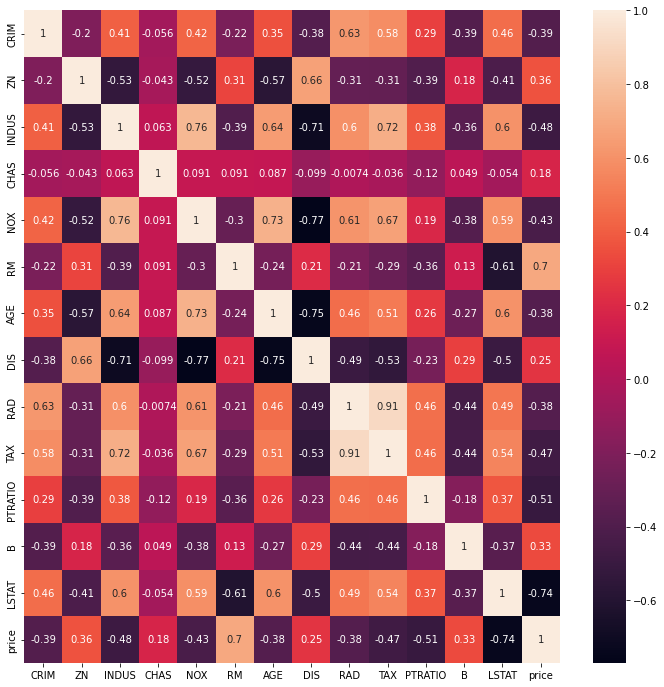

In [84]:
# 상관관계 분석
import seaborn as sb

plt.figure(figsize = (12,12)) 
# corr() : 상관관계 분석
# annot= True : 히트맵에 값을 표시  
sb.heatmap(df_boston.corr(), annot=True)   # 수치로되어있는경우에만 가능

# 상관관계 -> 상관관계가 높은걸 사용하는게 좋음 
#   - 양의 상관관계: 양수인 값(몸무게와 BMI)
#   - 음의 상관관계: 음수인 값 ( 키와 BMI)
#   - 0의 상관관계: 0에 가까운 값 (성적과 BMI) - 학습시 삭제

# 다중공선성 문제 (공통된선이 여러개있는거 - 선은여러개지만 같은거라는거 = 의미가없음) 
#  - 상관관계가 너무 높은 것 (90% 이상)
#  - 특성간의 다중공선성 
#        ->하나는 삭제시키기(y와관계(라벨과의관계) 비교해서 더 (상관관계가)더 낮은얘를 삭제 ! )
#  - 특성과 라벨간의 다중공선성
#         -> 해당 특성 삭제 

# 상관관계를 볼때 다중공선성도 봐서 전처리때 삭제를해주기 !!

In [85]:
# y(라벨) 값과 각 특성들을 비교해서 봐주면됨. 우리가 궁금한건 가격과의 관계닌까 
#세로에 price와 각특성들을 보면됨


# 집값을 가장 많이 떨어트리는 요인은 LSTAT  , 그다음이 세금 
# 집값을 가장 많이 올리는 요인은 방의수, 그 다음이 ZN

In [86]:
# 훈련 데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                           random_state=999)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [87]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [88]:
pred_train = lr_model.predict(X_train)
pred_test = lr_model.predict(X_test)

In [89]:
# 평가( 평가지표 : MSE )

from sklearn.metrics import mean_squared_error

print("훈련오차 : ", mean_squared_error(y_train, pred_train))
print("테스트오차 : ",  mean_squared_error(y_test, pred_test))

훈련오차 :  22.107559201393567
테스트오차 :  22.848378292355186


In [90]:
# 실제 집값의 차이로 계산 -> RMSE로 변경

import numpy as np

print("훈련오차 : ", np.sqrt(mean_squared_error(y_train, pred_train)))
print("테스트 오차 : ", np.sqrt(mean_squared_error(y_test, pred_test)))

훈련오차 :  4.701867629080339
테스트 오차 :  4.779997729325317


### 선형회귀의 문제점 
- 특성이 많아지면 과대적합이 발생
- 데이터가 많으면 느려진다. 

In [91]:
# 특성끼리 다곱해서 특성의 수를 증가  13개인 컬럼을 104개로 늘림
col = dfX.columns

for i in range(col.size):
    for j in range(i, col.size):
        dfX[col[i]+'x'+col[j]] = dfX[col[i]]*dfX[col[j]]

In [92]:
dfX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [93]:
X_train, X_test, y_train, y_test = train_test_split(dfX, boston.target,
                                                           random_state=999)

In [94]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

LinearRegression()

In [95]:
pred_train2 = lr_model2.predict(X_train)
pred_test2 = lr_model2.predict(X_test)

In [96]:
print("훈련오차 : ", mean_squared_error(y_train, pred_train2))
print("테스트오차 : ",  mean_squared_error(y_test, pred_test2))

훈련오차 :  5.51184319866594
테스트오차 :  13.392248107003255


In [97]:
# 특성의 수를 증가시키기 전의 오차 
훈련오차 :  22.107559201393567
테스트오차 :  22.848378292355186
    
# 특성의 수를 증가시켜서    
# 좋아진점 : 오차가 감소했다(성능이 좋아졌다)
# 나빠진점 : 과대적합이 발생했다 ? 복잡도가 올라짐 -> 특성이 많아짐  왜냐면 모든 데이터를 다 만족시키는 값으로 변경되어서

### 선형회귀의 과대적합을 해결하기 위한 모델
- 규제 : 학습에 참여하는 특성의 수를 제한해버리기(영향을 적게주는 특성은 제외)
    - L1 규제 : 특성이 많을 때 영향이 적은 특성을 제외시키는 것 - Lasso 모델 - 특정 특성을 선택 => 절대값을 취하는거
    - L2 규제 : 특성이 적을 때 특성의 영향의 차이를 줄여주는것 - Ridge 모델 -특성의 차이를 감소 => 제곱을취하는거 

In [98]:
# 그래서 모델 정규화 ! 모델정규화하는이유:

In [99]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=10)
lasso_model = Lasso(alpha=10, max_iter=10000)
# alpHa = 가장 강한 강도?

In [100]:
ridge_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)

Lasso(alpha=10, max_iter=10000)

In [101]:
#ㅇㅖ측
pred_train = ridge_model.predict(X_train)
pred_test = ridge_model.predict(X_test)

print("훈련오차(Ridge) : ", mean_squared_error(pred_train,y_train))
print("테스트오차(Lasso) : ", mean_squared_error(pred_test,y_test))

훈련오차(Ridge) :  6.892639636646658
테스트오차(Lasso) :  10.487375903742235


In [102]:
pred_train2 = lasso_model.predict(X_train)
pred_test2 = lasso_model.predict(X_test)

print("훈련오차(Ridge) : ", mean_squared_error(pred_train2,y_train))
print("테스트오차(Lasso) : ", mean_squared_error(pred_test2,y_test))

#사용된 특성의 수  : W값이 0이 아닌 특성의 수만 계수
print("사용된 특성의 수 : ", np.sum(lasso_model.coef_ != 0))

#규제를 약하게 하면 사용되는 특성의 수는 증가 -> 성능은 올라가지만 과적합 생김
# 규제를 강하게 하면 사용되는 특성의 수는 감소 -> 성능은 떨어지지만 과적합은 감소
# 규제를 아주 강하게 하면 사용되는 특성의 수는 많이 감소 -> 과소적합 발생

훈련오차(Ridge) :  12.642136869150919
테스트오차(Lasso) :  13.989330488630225
사용된 특성의 수 :  31


In [103]:
# R2스코어 : MSE, MAE, RMSE 등은 값의 범위를 고려하지 않음
#    -> 값의 범위가 달라도 오차가 같다면 같은 성능으로 판단하는 문제
#    -> 값의 범위 (분산)도 고려한 평가 모델 -> R2스코어

# 사이킷런에서 score() 함수로 분류인경우에는 정확도로 회귀인경우에는 R2스코어로 사용
print("훈련 R2 Score(ridge) : ", ridge_model.score(X_train,y_train))
print("테스트 R2 Score(ridge) : ", ridge_model.score(X_test,y_test))

훈련 R2 Score(ridge) :  0.9230856692722073
테스트 R2 Score(ridge) :  0.8478248569165678


## 선형분류 모델
- Logistic Regression
- SVM (support vector Mechine)

In [104]:
# 데이터 로드
# 포르투갈 비뉴베드르 지방에서 만들어진 와인 데이터
#데이터셋  1599개 레드와인(0) 데이터, 4898개 화이트와인(1)
# 12개의 특성
wine = pd.read_csv('./data/wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [105]:
from sklearn.model_selection import train_test_split

X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=0.3,
                                                       random_state=10)
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((4547, 12), (1950, 12), (4547,), (1950,))

In [106]:
from sklearn.linear_model import LogisticRegression
# 큰 데이터셋, 희소 데이터셋에서 잘 동작
# 특성이 많을수록 좋은 성능
# 학습속도, 예측속도 빠름

# 모델 생성
lr_model = LogisticRegression( C=10, max_iter =1000)

# 모델 학습
lr_model.fit(X_train,y_train)


# 자주사용되는 파라미터
# C: 규제 강도의 역수 ( C가 커질수록 규제 낮아지고 특성높아짐)
# max_iter : 최대 반복횟수( ) 기존에 모델들은 하나의 모델만 만들어서 한번 학습시켰는데. 이거는 100번동안 반복하면서 업그레이드되면서 학습되는 방식


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=1000)

In [107]:
#스코어 확인
lr_model.score(X_train,y_train)

0.987024411700022

In [108]:
lr_model.score(X_test,y_test)

0.9882051282051282

In [109]:
 # 교차검증
from sklearn.model_selection import cross_val_score

cross_val_score(lr_model, X_train, y_train, cv=5).mean()

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9876838453076078

In [110]:
from sklearn.svm import LinearSVC
#과대적합이 발생할 확률이 낮음
#오류데이터에 대한 영향이 적다.

# 모델 생성
svc_model = LinearSVC(C=10)

# 학습
svc_model.fit(X_train,y_train)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10)

In [111]:
svc_model.score(X_train,y_train)

0.9821860567407081

In [112]:
svc_model.score(X_test,y_test)

0.9825641025641025

In [113]:
pred = svc_model.predict(X_test)

In [116]:
from sklearn.metrics import cofusion_metrix
print(confusion_matrix(y_test,pred))

ImportError: cannot import name 'cofusion_metrix' from 'sklearn.metrics' (C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       484
           1       0.99      0.99      0.99      1466

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950

